# <font color="darkblue"> Algoritmo k-NN </font>

**Objetivos:**


*   Aplicar o algoritmo k-NN a um problema prático.



**Descrição:**

Implemente duas versões de um classificador usando o algoritmo k-NN que identifica dígitos escritos à mão a partir de um conjunto de imagens. Utilize o dataset <i> Digits </i> da biblioteca Scikit-Learn. Na primeira versão, você implementará o algoritmo de classificação do zero, enquanto que na segunda você deverá utilizar a biblioteca Scikit-Learn para realizar a classificação. Ao final, compare as acurácias obtidas e o tempo de execução de cada versão.

# <font color="darkblue"> Solução </font>

### Descrição do Dataset

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statistics as st
import time
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

digits = load_digits()

# Conhecendo dataset 
print(digits.DESCR + "\n")

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Exibição das imagens

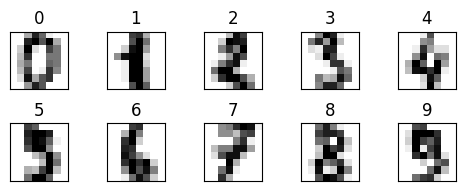

In [2]:
figure, axes = plt.subplots(nrows=2, ncols=5, figsize=(5, 2))

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([]) 
    axes.set_yticks([])  
    axes.set_title(target)
    
# usado para um numero nao ficar em cima do outro        
plt.tight_layout() 

### Implementação do classificador do zero

In [3]:
def minkowski(vector_a: np.array, vector_b: np.array, p: int):
    """
    Calculate the Minkowski distance between two vectors.

    Parameters
    ----------
        vector_a : numpy.ndarray
            A vector in the form of a numpy array.
        vector_b : numpy.ndarray
            A vector in the form of a numpy array.
        p : int
            The order of the Minkowski distance.

    Returns
    -------
        distance : numpy.ndarray
            An array containing the Minkowski distance between the 
            vectors.
    """
    ax = 1 if len(vector_a) > 1 else 0
    return (np.sum(abs(vector_a - vector_b)**p, axis=ax))**(1/p)


class KNN:
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def predict(self, k: int, p: int, vector_test: np.array):
        """
        Predicts the target value for a given test data point.

        Parameters
        ----------
            k : int
                Number of neighbors to consider for the prediction.
            p : int
                Order of the Minkowski distance used to calculate the 
                nearest neighbors.
            vector_test : numpy.ndarray
                A vector representing the test data point.

        Returns
        -------
            predict : int
                The predicted target value for the test data point.
        """
        all_dist = minkowski(self.data, vector_test, p)
        indexes = np.argsort(all_dist)[:k]
        targets = self.target[indexes]
        return st.mode(targets)

In [4]:
def get_accuracy(model: KNN, data: np.array, target: np.array, k: int, p: int):
    """
    Calculate the accuracy of a k-nearest neighbors (KNN) model on a 
        given dataset.

    Parameters
    ----------
        model : KNN
            An instance of a KNN model.
        data : numpy.ndarray
            A vector object containing the data points to be evaluated.
        target : numpy.ndarray
            A 1D array-like object containing the true labels for each 
            data point.
        k : int
            Number of neighbors to consider for the prediction.
        p : int
            Order of the Minkowski distance used to calculate the 
            nearest neighbors

    Returns
    -------
        accuracy : float
            A float indicating the proportion of correctly predicted 
            labels to total predictions.
    """
    predictions = [model.predict(k, p, vector) for vector in data]
    return np.mean(predictions == target)  

In [5]:
# Splitting the data for both implementations to avoid any problem
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target, 
                                                    test_size=0.3, 
                                                    random_state=42)

In [6]:
start_time = time.time()

model = KNN(X_train, y_train)
acc = get_accuracy(model, X_test, y_test, k=5, p=2)

print(f"Runtime: {time.time() - start_time:.5f} seconds")
print(f"KNN accuracy on test: {acc*100:.3f}%")

Runtime: 0.11967 seconds
KNN accuracy on test: 99.074%


In [7]:
acc_all = get_accuracy(model, digits.data, digits.target, k=5, p=2)
print(f"KNN accuracy on all dataset: {acc_all*100:.3f}%")

KNN accuracy on all dataset: 99.054%


### Implementação utilizando o scikit-learn

In [8]:
start_time = time.time()

model_sk = KNeighborsClassifier(n_neighbors=5, p=2)
model_sk.fit(X_train, y_train)
acc_sk = model_sk.score(X_test, y_test)

print(f"Runtime: {time.time() - start_time:.5f} seconds")
print(f"KNN accuracy on test using sklearn: {acc_sk*100:.3f}%")

Runtime: 0.06980 seconds
KNN accuracy on test using sklearn: 99.259%


In [9]:
acc_sk = model_sk.score(digits.data, digits.target)
print(f"KNN accuracy on all dataset using sklearn: {acc_sk*100:.3f}%")

KNN accuracy on all dataset using sklearn: 99.054%


### Conclusão

Falando sobre o tempo de execução, o do Scikit-Learn é quase 2x mais rápido(aprox. 1.7x), visto que é feito com inúmeras otimizações, isso é esperado, porém o meu modelo não foi lento. Falando sobre a acurácia, foi idêntica quando aplicada ao dataset inteiro, isso significa que meu modelo teve uma boa eficiência comparado ao do sk-learn - lembrando que os dados de treino e teste foram os mesmo para meu modelo e para o do Scikit-Learn.